In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [3]:
df = pd.read_csv(r'D:\Data Sets\car_price_dataset.csv')
  # Make sure this file is in your PyCharm project folder
print(df.head())
print("Columns:", df.columns.tolist())


        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  
Columns: ['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission', 'Mileage', 'Doors', 'Owner_Count', 'Price']


In [4]:
# 🔹 Data Cleaning
print("Missing values:\n", df.isnull().sum())
df.dropna(inplace=True)  # Drop rows with missing values

Missing values:
 Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


In [5]:
# 🔹 Encode Binary Categorical Columns
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission'], drop_first=True)

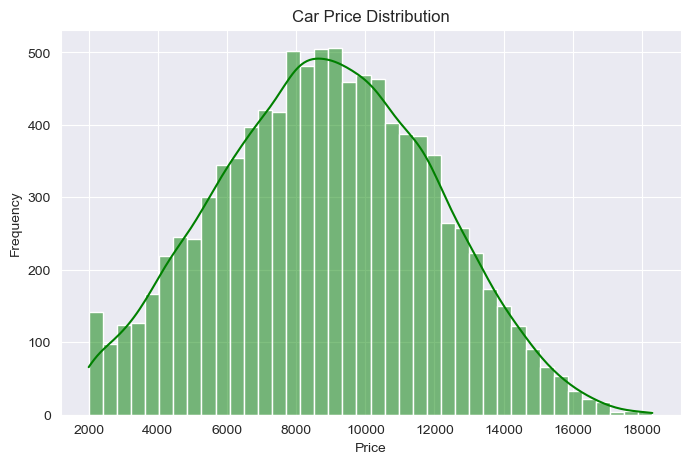

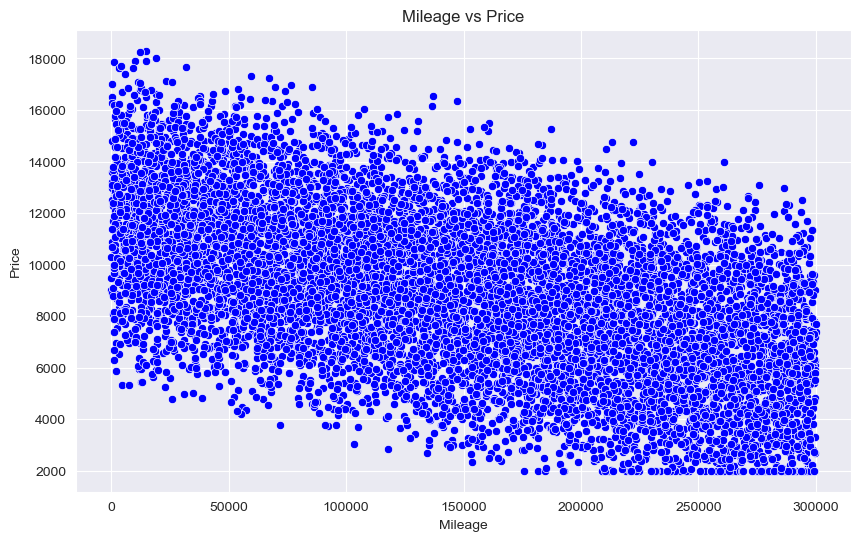

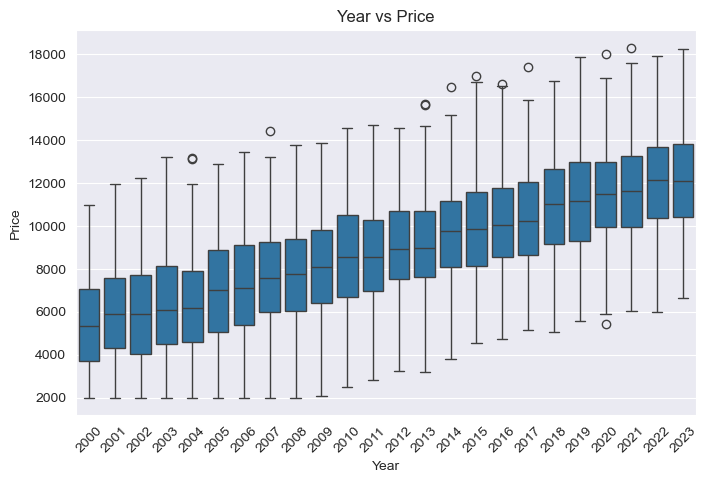

In [6]:
# 🔹 Exploratory Data Analysis (EDA)

# Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True, color='green')
plt.title('Car Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Mileage vs Price
plt.figure(figsize=(10,6))
sns.scatterplot(x='Mileage', y='Price', data=df, color='blue')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Year vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='Year', y='Price', data=df)
plt.title('Year vs Price')
plt.xticks(rotation=45)
plt.show()

In [8]:
# 🔹 Encode All Categorical Columns Properly
df_copy = df.copy()
label_cols = ['Brand', 'Model', 'Fuel_Type', 'Transmission']

le = LabelEncoder()
for col in label_cols:
    df_copy[col] = le.fit_transform(df_copy[col])

In [13]:
# 🔹 Define Features and Target
X = df_copy[['Mileage', 'Year', 'Engine_Size', 'Brand', 'Model', 'Fuel_Type', 'Transmission']]
y = df_copy['Price']


In [15]:
# 🔹 Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# 🔹 Train the Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
# 🔹 Predict and Evaluate
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


R² Score: 0.9108861261174153
RMSE: 904.8544116838151


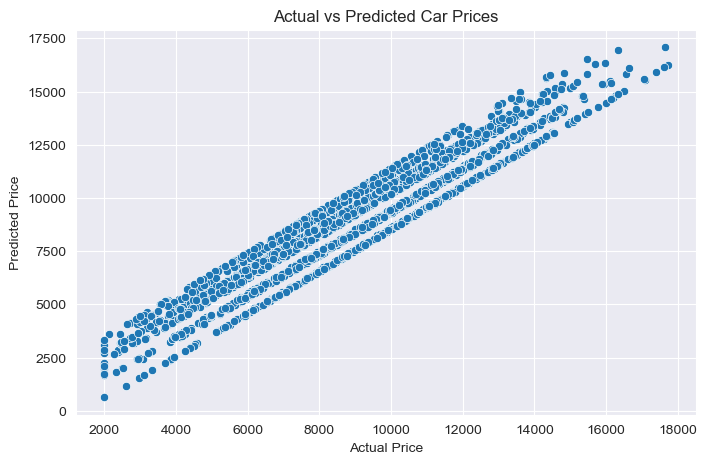

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()
